In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("./Sales.csv")

In [6]:
for col in data.columns:
    nulls_average = np.mean(data[col].isnull())
    print('{}  -  {:.2f}%'.format(col, nulls_average * 100))
#No null values

Date  -  0.00%
Day  -  0.00%
Month  -  0.00%
Year  -  0.00%
Customer_Age  -  0.00%
Age_Group  -  0.00%
Customer_Gender  -  0.00%
Country  -  0.00%
State  -  0.00%
Product_Category  -  0.00%
Sub_Category  -  0.00%
Product  -  0.00%
Order_Quantity  -  0.00%
Unit_Cost  -  0.00%
Unit_Price  -  0.00%
Profit  -  0.00%
Cost  -  0.00%
Revenue  -  0.00%


In [7]:
data.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [16]:
duplicateRows = data[data.duplicated()]
duplicateRows
#Duplicates are necessary because they represent sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [22]:
data.corr(method = "pearson", numeric_only = True)

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


Text(120.58159722222221, 0.5, 'Sales Variables')

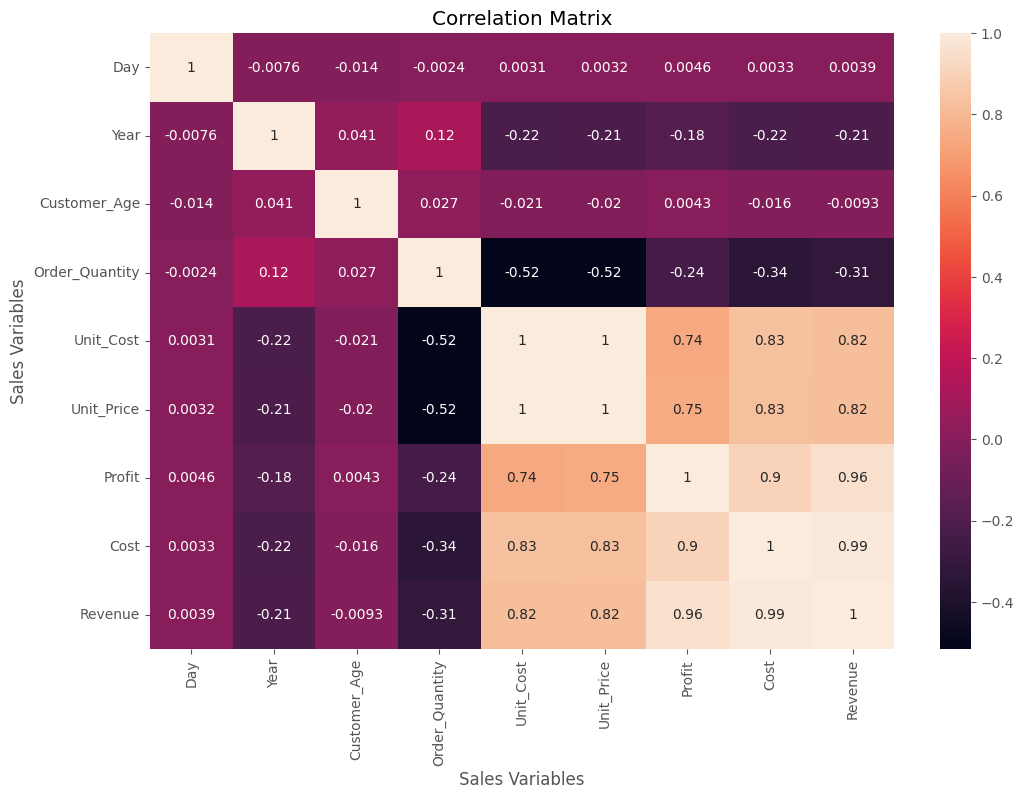

In [23]:
#How to see it with a heatmap.
corr_matrix = data.corr(method = "pearson", numeric_only = True)
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix")
plt.xlabel("Sales Variables")
plt.ylabel("Sales Variables")

In [24]:
#Create a numeric representation for every column so we can obtain the correlation. 
data_numerized = data

for column in data_numerized.columns:
    if(data_numerized[column].dtype == "category" or data_numerized[column].dtype == "object"):
        data_numerized[column] = data_numerized[column].astype("category")
        data_numerized[column] = data_numerized[column].cat.codes
data_numerized.dtypes


Date                int16
Day                 int64
Month                int8
Year                int64
Customer_Age        int64
Age_Group            int8
Customer_Gender      int8
Country              int8
State                int8
Product_Category     int8
Sub_Category         int8
Product             int16
Order_Quantity      int64
Unit_Cost           int64
Unit_Price          int64
Profit              int64
Cost                int64
Revenue             int64
dtype: object

Text(120.58159722222221, 0.5, 'Sales Variables')

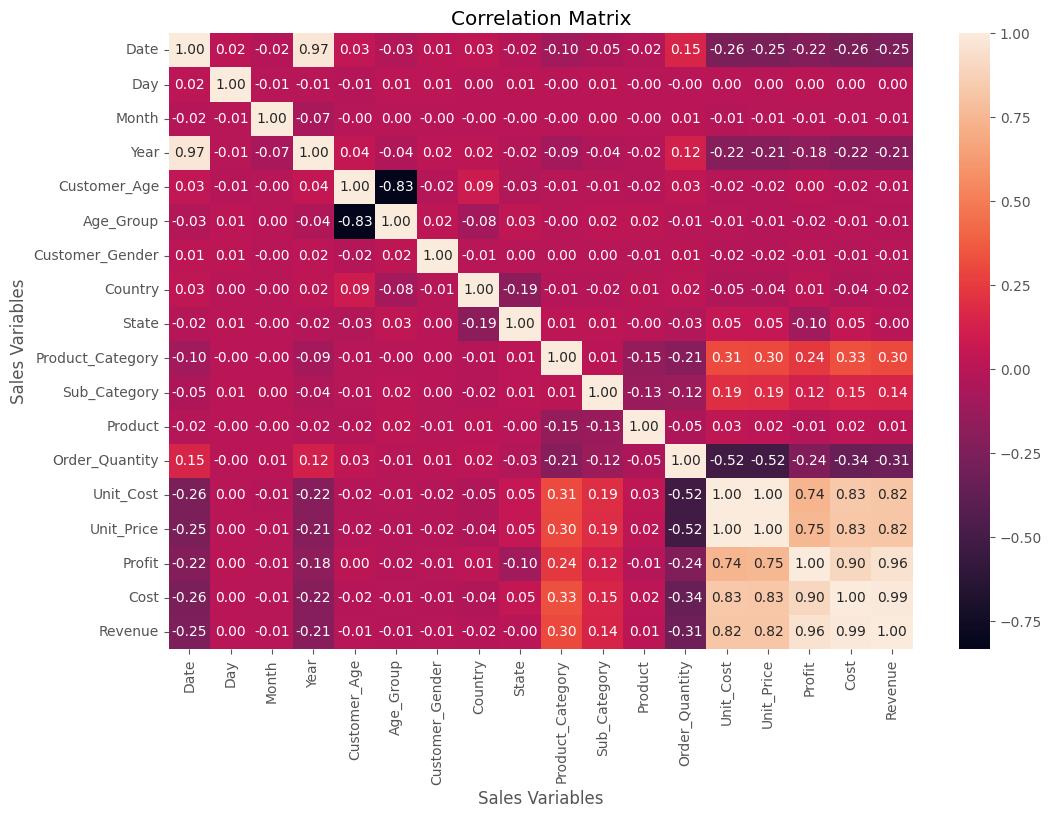

In [30]:
#How to see it with a heatmap.
corr_matrix = data_numerized.corr(method = "pearson", numeric_only = True)
sns.heatmap(corr_matrix, annot = True, fmt=".2f")
plt.title("Correlation Matrix")
plt.xlabel("Sales Variables")
plt.ylabel("Sales Variables")

Text(0, 0.5, 'Product_Category')

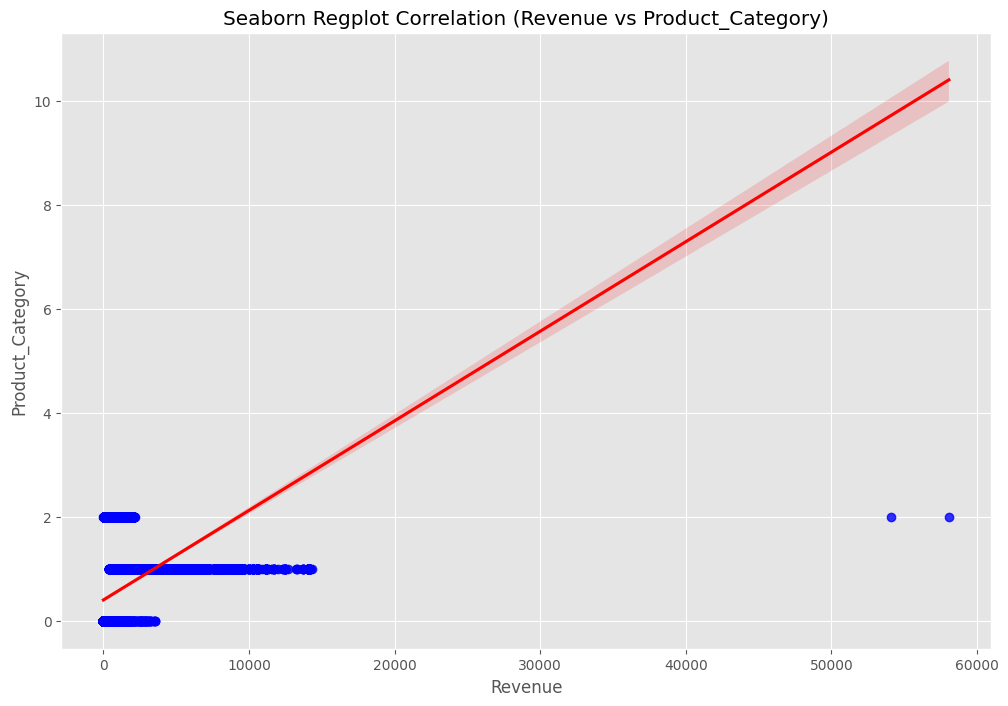

In [40]:
x_column = "Revenue"
y_column = "Product_Category"
x_values = data_numerized[x_column]
y_values = data_numerized[y_column]

sns.regplot(x = x_values, y = y_values, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


plt.title('Seaborn Regplot Correlation ({} vs {})'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)

In [39]:
data[["Unit_Cost","Unit_Price"]]

,Unit_Cost,Unit_Price
0,45,120
1,45,120
2,45,120
3,45,120
4,45,120
...,...,...
113031,24,64
113032,24,64
113033,24,64
113034,24,64
